In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings('ignore')

In [2]:
# What analysis can be done for the data
#1) Number of times the teams won the FIA championship✅
#2) The biggest rivalry between champions & Teams✅
#3) The Nationality of Drivers✅
#4) Which driver sets the fastest lap in which circuit and holds the record
#5) Fastest pitstops for the team
#6) Maximum number of points earned by the drivers and the teams
#7) Which track takes the most time and which track takes the shortest time
#8) Which drivers could convert pole position to a race win

# 1) Number of times the teams won the FIA Championship

In [3]:
df1 = pd.read_csv('F1_Dataset/circuits.csv')
df1.head(10)

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
5,6,monaco,Circuit de Monaco,Monte-Carlo,Monaco,43.73470,7.42056,7,http://en.wikipedia.org/wiki/Circuit_de_Monaco
6,7,villeneuve,Circuit Gilles Villeneuve,Montreal,Canada,45.50000,-73.52280,13,http://en.wikipedia.org/wiki/Circuit_Gilles_Vi...
7,8,magny_cours,Circuit de Nevers Magny-Cours,Magny Cours,France,46.86420,3.16361,228,http://en.wikipedia.org/wiki/Circuit_de_Nevers...
8,9,silverstone,Silverstone Circuit,Silverstone,UK,52.07860,-1.01694,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.32780,8.56583,103,http://en.wikipedia.org/wiki/Hockenheimring


In [4]:
df1.describe()

,circuitId,lat,lng,alt
count,77.000000,77.000000,77.000000,77.000000
mean,39.883117,33.442925,1.076683,247.012987
std,23.001701,22.808866,65.516951,362.738469
min,1.000000,-37.849700,-118.189000,-7.000000
25%,20.000000,32.777400,-9.394170,18.000000
50%,40.000000,40.951700,3.930830,129.000000
75%,59.000000,46.958900,19.248600,332.000000
max,80.000000,57.265300,144.968000,2227.000000


In [5]:
circuit_counts = df1['name'].value_counts()
print(circuit_counts)

name
Albert Park Grand Prix Circuit    1
Nivelles-Baulers                  1
Zeltweg                           1
Prince George Circuit             1
Reims-Gueux                       1
                                 ..
Circuito de Jerez                 1
Autódromo Juan y Oscar Gálvez     1
Yas Marina Circuit                1
Las Vegas Strip Street Circuit    1
Miami International Autodrome     1
Name: count, Length: 77, dtype: int64


In [6]:
df2 = pd.read_csv('F1_dataset/constructors.csv')
df2

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
210,214,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [7]:
df2_new = df2.drop('url',axis=1)
df2_new.head(5)

,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


In [8]:
df3 = pd.read_csv('F1_dataset/constructor_standings.csv')
df3

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13266,28848,1132,15,0.0,10,10,0
13267,28849,1132,210,27.0,7,7,0
13268,28850,1132,215,31.0,6,6,0
13269,28851,1132,3,4.0,9,9,0


In [9]:
df3.isnull().sum()

constructorStandingsId    0
raceId                    0
constructorId             0
points                    0
position                  0
positionText              0
wins                      0
dtype: int64

In [10]:
# Let's filter out the team that won the FIA constructors championship
championship_winners = df3[df3['position']==1]
championship_winners

# Count the championships per team (constructorID)
team_wins = championship_winners['constructorId'].value_counts().reset_index()
team_wins.columns = ['constructorId', 'championship_wins']

# Left join with constructors to get the name of the winning teams
team_wins = team_wins.merge(df2, on='constructorId', how='left')

# Sorting the results
team_wins = team_wins.sort_values(by='championship_wins', ascending=False)

# Display results
print("Number of FIA Championships Won by Teams:")
print(team_wins[['name', 'championship_wins']])

Number of FIA Championships Won by Teams:
               name  championship_wins
0           Ferrari                234
1           McLaren                165
2          Mercedes                145
3          Red Bull                120
4          Williams                114
5           Renault                 46
6        Team Lotus                 44
7          Benetton                 29
8      Lotus-Climax                 23
9     Cooper-Climax                 20
10            Brawn                 17
12          Tyrrell                 16
11    Brabham-Repco                 16
13              BRM                 14
14       Lotus-Ford                 12
15       Matra-Ford                 11
16          Brabham                  6
17           Ligier                  4
18           Cooper                  4
19          Vanwall                  3
20            March                  3
21  Cooper-Maserati                  1
22       BMW Sauber                  1
23             Wolf   

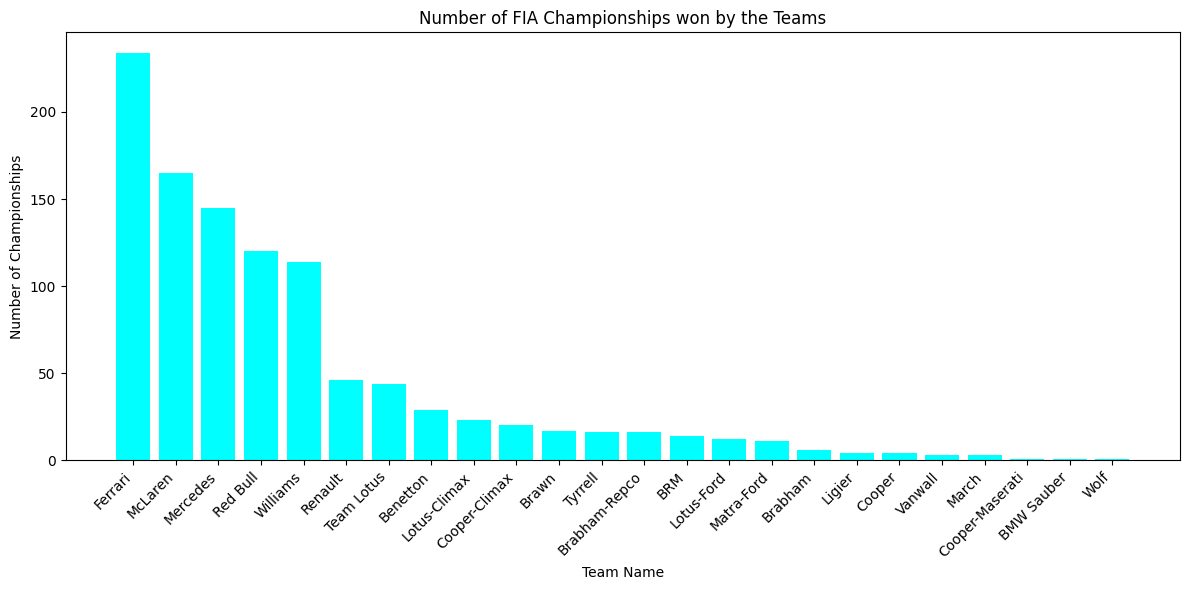

In [11]:
# Plotting the results
plt.figure(figsize=(12,6))
plt.bar(team_wins['name'], team_wins['championship_wins'], color='cyan')
plt.title('Number of FIA Championships won by the Teams')
plt.xlabel('Team Name')
plt.ylabel('Number of Championships')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

#show the plot
plt.show()

# 2)The biggest rivalry between champions & Teams

In [12]:
df4 = pd.read_csv('F1_dataset/driver_standings.csv')
df4

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34590,72867,1132,839,3.0,18,18,0
34591,72868,1132,842,6.0,15,15,0
34592,72869,1132,822,0.0,21,21,0
34593,72870,1132,858,0.0,20,20,0


In [13]:
df4.isnull().sum()

driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

In [14]:
# Now for finding the constructors rivals, let's filter out the top 2 positions in each grand prix
top_2_races = df3[df3['position'].isin([1, 2])]

# Now merging them with the constructors to get the team names
top_2_races = top_2_races.merge(df2[['constructorId','name']], on='constructorId', how='left')

# Now Group by raceId and identify rivalries (top 2 teams per race)
rivalries = top_2_races.groupby('raceId')['name'].apply(lambda x: tuple(sorted(x))).reset_index()
rivalries.columns = ['raceId','rivalry_pair']

# Now let's count the occurance of the rivalry
rivalry_counts = rivalries['rivalry_pair'].value_counts().reset_index()
rivalry_counts.columns = ['rivalry_pair', 'count']

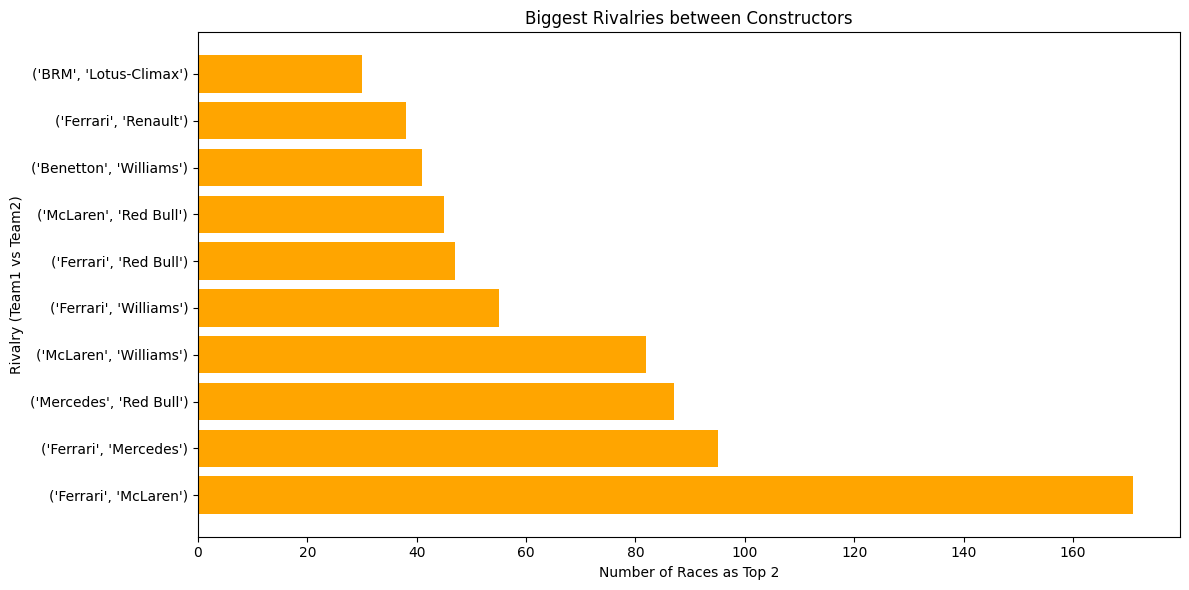

In [15]:
# PLotting the biggest Rivals
plt.figure(figsize=(12,6))
rivalry_counts_top = rivalry_counts.head(10) # Top 10 rivalries
plt.barh(rivalry_counts_top['rivalry_pair'].astype(str), rivalry_counts_top['count'], color='orange')
plt.title('Biggest Rivalries between Constructors')
plt.xlabel('Number of Races as Top 2')
plt.ylabel('Rivalry (Team1 vs Team2)')
plt.tight_layout()

# show the graph
plt.show()

# 3) The Nationality of Drivers

In [16]:
df5 = pd.read_csv('F1_dataset/drivers.csv')
df5

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri
856,858,sargeant,2,SAR,Logan,Sargeant,2000-12-31,American,http://en.wikipedia.org/wiki/Logan_Sargeant
857,859,lawson,40,LAW,Liam,Lawson,2002-02-11,New Zealander,http://en.wikipedia.org/wiki/Liam_Lawson


In [17]:
df5_new1 = df5.copy(deep=True)
df5_new1.head(5)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [18]:
# We drop the url column, we don't need that columns for the analysis
df5_new = df5.drop('url', axis=1)
print(df5_new.head(10))

   driverId   driverRef number code   forename     surname         dob  \
0         1    hamilton     44  HAM      Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI       Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS       Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO   Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV     Heikki  Kovalainen  1981-10-19   
5         6    nakajima     \N  NAK     Kazuki    Nakajima  1985-01-11   
6         7    bourdais     \N  BOU  Sébastien    Bourdais  1979-02-28   
7         8   raikkonen      7  RAI       Kimi   Räikkönen  1979-10-17   
8         9      kubica     88  KUB     Robert      Kubica  1984-12-07   
9        10       glock     \N  GLO       Timo       Glock  1982-03-18   

  nationality  
0     British  
1      German  
2      German  
3     Spanish  
4     Finnish  
5    Japanese  
6      French  
7     Finnish  
8      Polish  
9      German  


In [19]:
# Now let's plot the nationality of the drivers, according which driver is oldest on the grid
df5_new['dob'] = pd.to_datetime(df5_new['dob'], errors = 'coerce')
today = datetime.today()
# The below is calculating the age
df5_new['age'] = df5_new['dob'].apply(lambda x: (today - x).days // 365 if pd.notnull(x) else None)

# Adding the age group of the drivers
df5_new['Age Group'] = pd.cut(df5_new['age'],
                              bins = [0, 25, 35, 50, 100], 
                              labels = ['<25', '25-35', '35-50', '>50'])

# Sort the drivers by age (oldest to youngest)
driver_by_age = df5_new.sort_values(by='age', ascending=False)

# Group by nationality & age group
driver_by_nationality_sorted = (driver_by_age.groupby(['nationality', 'Age Group'])['driverId'].count().unstack(fill_value=0))

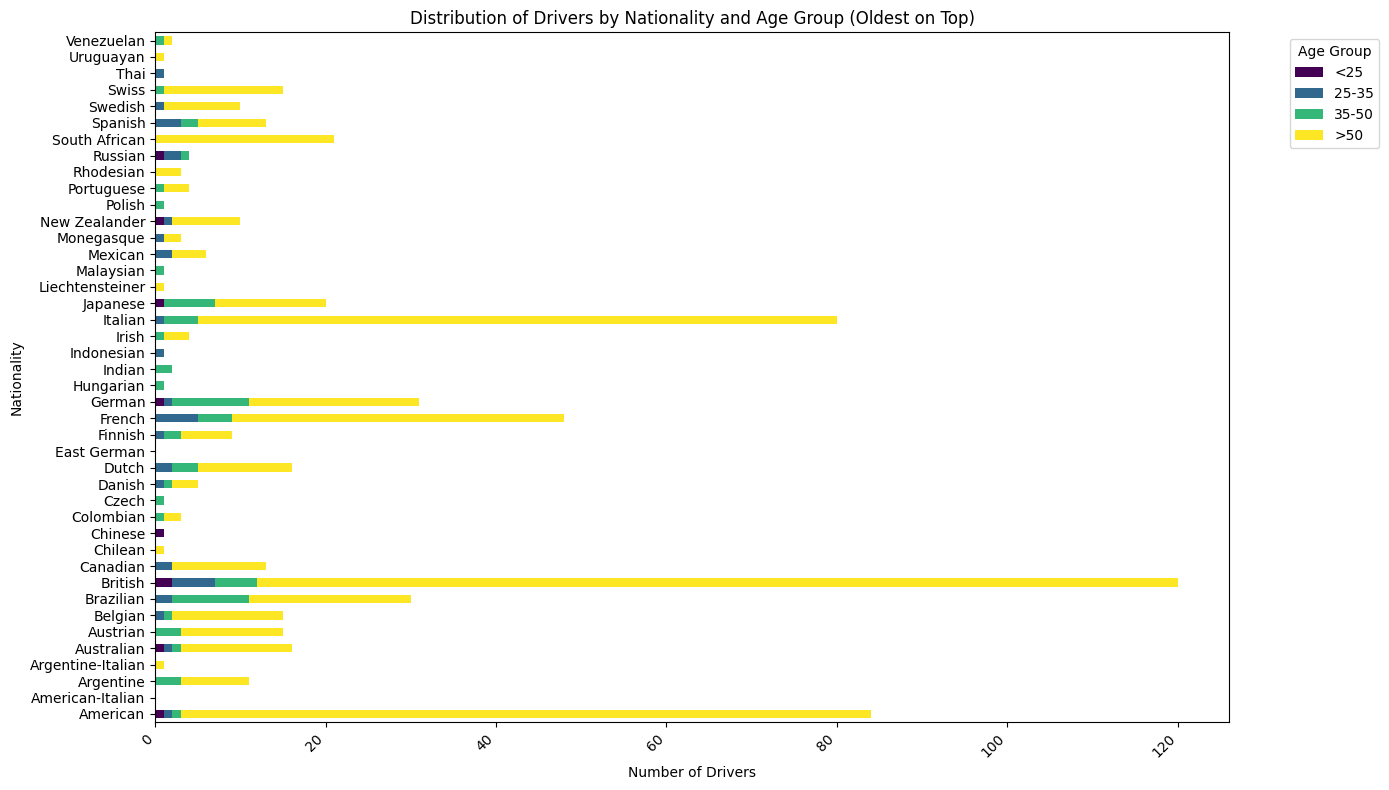

In [20]:
# Plot stacked bar chart
plt.figure(figsize=(14,8))
driver_by_nationality_sorted.plot(kind='barh', stacked= True, colormap='viridis', ax=plt.gca())

# Customizations of the chart
plt.title('Distribution of Drivers by Nationality and Age Group (Oldest on Top)')
plt.xlabel('Number of Drivers')
plt.ylabel('Nationality')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# show the output
plt.show()

# 4) Which Driver Sets the Fastest Lap in Which Circuit and Holds the Record

In [25]:
df6 = pd.read_csv('F1_dataset/drivers.csv')
df6.head(10)

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,6,nakajima,\N,NAK,Kazuki,Nakajima,1985-01-11,Japanese,http://en.wikipedia.org/wiki/Kazuki_Nakajima
6,7,bourdais,\N,BOU,Sébastien,Bourdais,1979-02-28,French,http://en.wikipedia.org/wiki/S%C3%A9bastien_Bo...
7,8,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica
9,10,glock,\N,GLO,Timo,Glock,1982-03-18,German,http://en.wikipedia.org/wiki/Timo_Glock


In [22]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26519 entries, 0 to 26518
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26519 non-null  int64  
 1   raceId           26519 non-null  int64  
 2   driverId         26519 non-null  int64  
 3   constructorId    26519 non-null  int64  
 4   number           26519 non-null  object 
 5   grid             26519 non-null  int64  
 6   position         26519 non-null  object 
 7   positionText     26519 non-null  object 
 8   positionOrder    26519 non-null  int64  
 9   points           26519 non-null  float64
 10  laps             26519 non-null  int64  
 11  time             26519 non-null  object 
 12  milliseconds     26519 non-null  object 
 13  fastestLap       26519 non-null  object 
 14  rank             26519 non-null  object 
 15  fastestLapTime   26519 non-null  object 
 16  fastestLapSpeed  26519 non-null  object 
 17  statusId    

In [23]:
df7 = pd.read_csv('F1_dataset/results.csv')
df7

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [33]:
races_df = pd.read_csv('F1_dataset/races.csv')
races_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [34]:
# Replace placeholder '\N' with NaN for proper handling
races_df.replace('\\N', np.nan, inplace=True)

# Checking for the missing values
print('Missing Values per Column:')
print(races_df.isnull().sum())

# Now let's drop or imputate the missing values as needed, like droping the columns or rows with excessive missing values
races_df_cleaned = races_df.drop(columns=['sprint_date', 'sprint_time'], axis=1)

# Impute missing 'time' or 'fp1_date' with a placeholder
races_df_cleaned['fp1_date'].fillna('Not Available', inplace=True)
races_df_cleaned['time'].fillna('00:00:00', inplace=True)

# Verifying the cleaned data
print("\nAfter Cleaning:")
print(races_df_cleaned.isnull().sum())

# Save cleaned data for future analysis
races_df_cleaned.to_csv('F1_dataset/races_cleaned.csv', index=False)

Missing Values per Column:
raceId            0
year              0
round             0
circuitId         0
name              0
date              0
time            731
url               0
fp1_date       1035
fp1_time       1057
fp2_date       1035
fp2_time       1057
fp3_date       1053
fp3_time       1072
quali_date     1035
quali_time     1057
sprint_date    1107
sprint_time    1110
dtype: int64

After Cleaning:
raceId           0
year             0
round            0
circuitId        0
name             0
date             0
time             0
url              0
fp1_date         0
fp1_time      1057
fp2_date      1035
fp2_time      1057
fp3_date      1053
fp3_time      1072
quali_date    1035
quali_time    1057
dtype: int64


In [30]:
# Merging results, drivers, and circuits data
results_with_drivers = df7.merge(
    df6[['driverId', 'forename', 'surname']],
    on = 'driverId',
    how = 'left'
)
# Now let's filter out the rows with non-null fastest lap
fastest_lap_records = results_with_drivers[['raceId', 'forename', 'surname', 'fastestLap']].dropna()
fastest_lap_per_race = fastest_lap_records.loc[fastest_lap_records.groupby('raceId')['fastestLap'].idxmin()]

# Merge with races to get the race names
fastest_lap_with_races = fastest_lap_per_race.merge(
    df8[['raceId', 'name']],  # Include race names
    on='raceId',
    how='left'
)

TypeError: can only concatenate str (not "float") to str

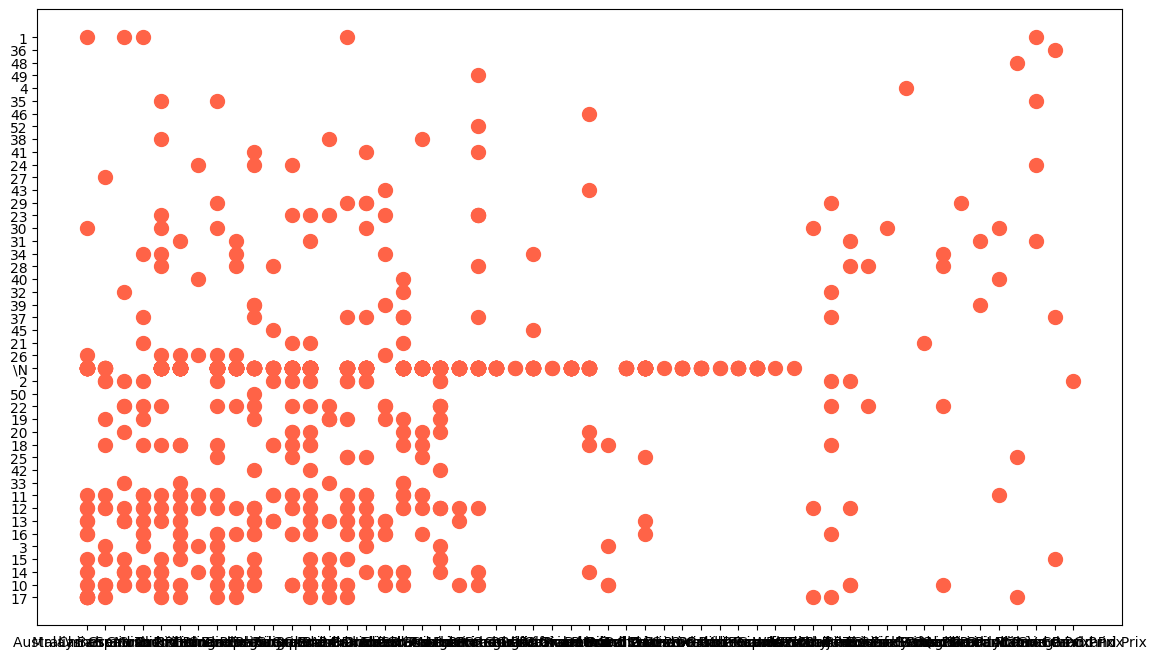

In [31]:
# Scatter plot of fastest lap times
plt.figure(figsize=(14,8))
plt.scatter(
    fastest_lap_with_races['name'], 
    fastest_lap_with_races['fastestLap'], 
    color='tomato', s=100
)
# Annotate the drivers on the plot
for i in range(len(fastest_lap_with_races)):
    plt.text(
          fastest_lap_with_races['name'].iloc[i],
        fastest_lap_with_races['fastestLap'].iloc[i] + 0.05,
        f"{fastest_lap_with_races['forename'].iloc[i]} {fastest_lap_with_races['surname'].iloc[i]}",
        fontsize=9, rotation=45, ha='right'
    )

# Formation of the chart
plt.title("Fastest Lap Times by Race with Driver Names")
plt.xlabel("Race Name")
plt.ylabel("Fastest Lap Time (Seconds)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
df9 = pd.read_csv('F1_dataset/qualifying.csv')
df9

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
10249,10307,1132,822,15,77,16,1:32.431,\N,\N
10250,10308,1132,825,210,20,17,1:32.905,\N,\N
10251,10309,1132,839,214,31,18,1:34.557,\N,\N
10252,10310,1132,815,9,11,19,1:38.348,\N,\N
